In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

from math import pi

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('dataset/marketing_campaign_clean.csv')

In [3]:
df.head(3)

,education,income,recency,wines,fruits,meat,fish,sweets,gold,deals_purchases,web_purchases,catalog_purchases,store_purchases,web_visits_month,campaign_3,campaign_4,campaign_5,campaign_1,campaign_2,complain,response,living_with,age,total_spent,children,family_size
0,Graduate,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Alone,67,1617,0,1
1,Graduate,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Alone,70,27,2,3
2,Graduate,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Partner,59,776,0,2


### Feature Engineering

#### Encoding categorical features

In [4]:
cat = (df.dtypes == 'object')
object_cols = list(cat[cat].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['education', 'living_with']


In [5]:
education_mapping = {
    "Undergraduate": 0,
    "Graduate": 1,
    "Postgraduate": 2
}
df.education = df.education.map(education_mapping)

In [6]:
living_status_mapping = {
    "Alone": 0,
    "Partner": 1,
}
df.living_with = df.living_with.map(living_status_mapping)

In [7]:
cat = (df.dtypes == 'object')
object_cols = list(cat[cat].index)

In [8]:
le = LabelEncoder()
for i in object_cols:
    df[i] = df[[i]].apply(le.fit_transform)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          2229 non-null   int64  
 1   income             2229 non-null   float64
 2   recency            2229 non-null   int64  
 3   wines              2229 non-null   int64  
 4   fruits             2229 non-null   int64  
 5   meat               2229 non-null   int64  
 6   fish               2229 non-null   int64  
 7   sweets             2229 non-null   int64  
 8   gold               2229 non-null   int64  
 9   deals_purchases    2229 non-null   int64  
 10  web_purchases      2229 non-null   int64  
 11  catalog_purchases  2229 non-null   int64  
 12  store_purchases    2229 non-null   int64  
 13  web_visits_month   2229 non-null   int64  
 14  campaign_3         2229 non-null   int64  
 15  campaign_4         2229 non-null   int64  
 16  campaign_5         2229 

#### Dropping useless features

In [10]:
to_del = ['campaign_1', 'campaign_2', 'campaign_3', 'campaign_4', 'campaign_5', 'complain', 'response' ]
df2 = df.drop(to_del, axis=1)

#### Standardazing the features

In [11]:
scaler = StandardScaler()
scaler.fit(df2)
scaled_df = pd.DataFrame(scaler.transform(df2), columns=df2.columns)

In [12]:
scaled_df.head()

,education,income,recency,wines,fruits,meat,fish,sweets,gold,deals_purchases,web_purchases,catalog_purchases,store_purchases,web_visits_month,living_with,age,total_spent,children,family_size
0,-0.409710,0.316030,0.307314,0.980166,1.550778,1.736151,2.456789,1.472029,0.842690,0.358938,1.405471,2.633984,-0.559160,0.689920,-1.345676,1.015715,1.683247,-1.266277,-1.759459
1,-0.409710,-0.256586,-0.383771,-0.873191,-0.637618,-0.726371,-0.651738,-0.632996,-0.731824,-0.168815,-1.117198,-0.585437,-1.176175,-0.138430,-1.345676,1.272020,-0.962795,1.393978,0.445057
2,-0.409710,0.970262,-0.798422,0.359410,0.569773,-0.174584,1.341376,-0.149082,-0.040574,-0.696567,1.405471,-0.227723,1.291882,-0.552605,0.743121,0.332234,0.283674,-1.266277,-0.657201
3,-0.409710,-1.212954,-0.798422,-0.873191,-0.562156,-0.662528,-0.505455,-0.584604,-0.751025,-0.168815,-0.756817,-0.943150,-0.559160,0.275745,0.743121,-1.291031,-0.919526,0.063851,0.445057
4,1.125153,0.323556,1.551268,-0.392031,0.418849,-0.215626,0.152822,-0.003908,-0.559011,1.414444,0.324327,0.129990,0.057854,-0.138430,0.743121,-1.034726,-0.305445,0.063851,0.445057


#### Applying PCA

In [13]:
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_columns = ['PC1', 'PC2', 'PC3']
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=pca_columns)
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2229.0,0.000000e+00,2.725103,-5.686385,-2.411214,-0.843540,2.345072,7.356658
PC2,2229.0,6.375440e-18,1.467051,-3.904447,-1.004320,-0.135817,0.946390,5.896119
PC3,2229.0,6.375440e-18,1.159030,-4.321464,-0.800029,0.069851,0.766370,3.206013


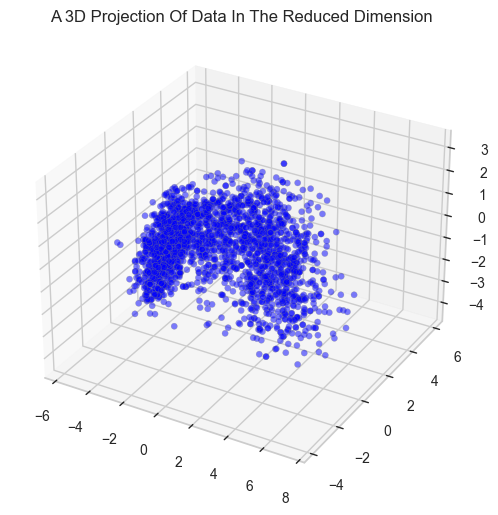

In [14]:
x =PCA_df[pca_columns[0]]
y =PCA_df[pca_columns[1]]
z =PCA_df[pca_columns[2]]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", alpha=0.5, edgecolors="grey", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### Clustering Model

#### Selecting the number of clusters

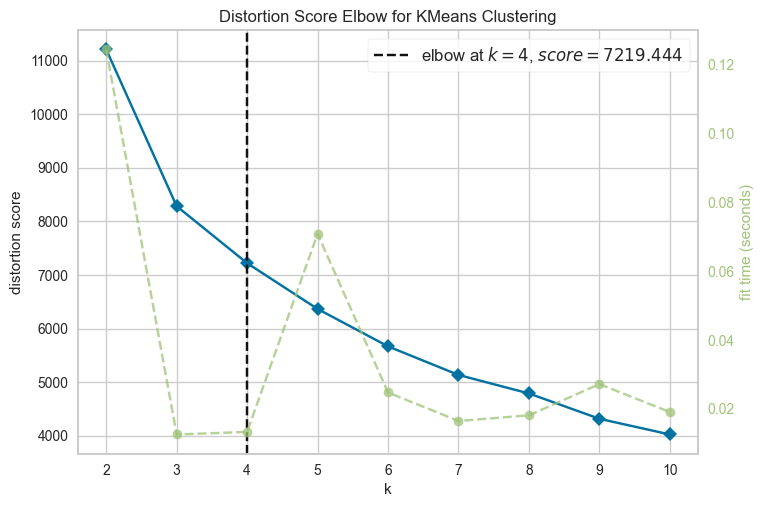

In [15]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10, n_init=50, init='k-means++')
Elbow_M.fit(PCA_df)
Elbow_M.show()
plt.show()

#### Creating the KMeans model

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=50, init='k-means++')
cluster_labels = kmeans.fit_predict(PCA_df)

In [17]:
PCA_df["Clusters"] = cluster_labels
df["Clusters"] = cluster_labels
scaled_df["Clusters"] = cluster_labels

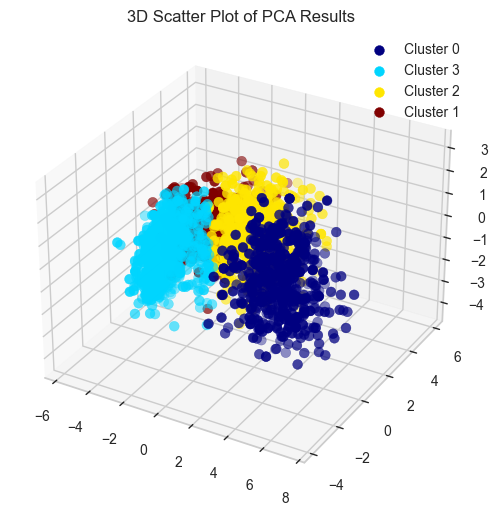

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = PCA_df[pca_columns[0]]
y = PCA_df[pca_columns[1]]
z = PCA_df[pca_columns[2]]

clusters = PCA_df['Clusters'].unique()

colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    ix = PCA_df['Clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)
    
ax.set_title('3D Scatter Plot of PCA Results')
ax.legend()
plt.show()

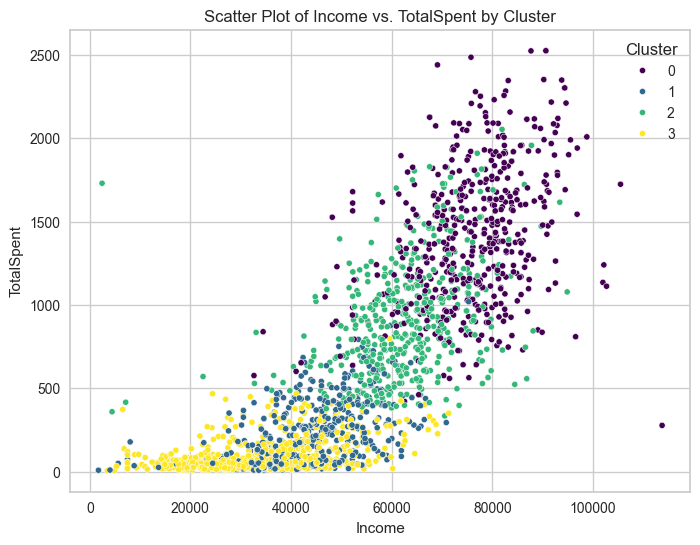

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='total_spent', hue='Clusters', data=df, palette='viridis', s=20)

plt.title('Scatter Plot of Income vs. TotalSpent by Cluster')
plt.xlabel('Income')
plt.ylabel('TotalSpent')
plt.legend(title='Cluster')

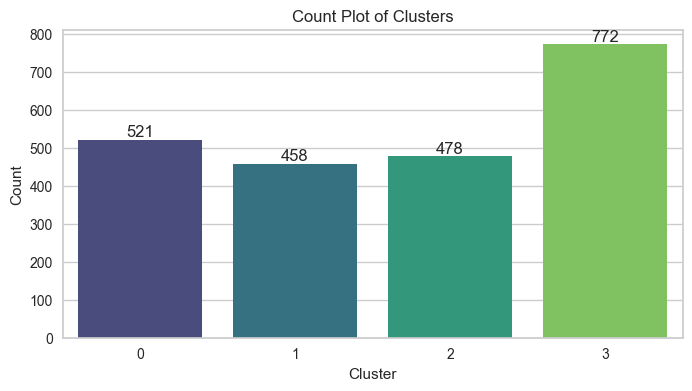

In [20]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Clusters', data=df, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count Plot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [21]:
features = ['education', 'income', 'web_visits_month', 'age', 'total_spent', 'living_with', 'children', 'family_size']
grouped_clusters = df.groupby(['Clusters'])[features].mean()
grouped_clusters.sort_values(['income', 'total_spent'], ascending=False)

,education,income,web_visits_month,age,total_spent,living_with,children,family_size
Clusters,,,,,,,,
0,1.209213,75840.718343,2.710173,55.023033,1400.341651,0.575816,0.149712,1.725528
2,1.443515,62682.790806,5.200837,59.709205,910.958159,0.682008,1.002092,2.684100
1,1.460699,43281.361920,6.729258,58.762009,236.676856,0.803493,1.812227,3.615721
3,1.081606,33396.892501,6.360104,50.158031,98.882124,0.572539,0.952073,2.524611


**Cluster 0**

- Customers: 521;
- Avg. Income: $ 75,840.00;
- Avg. Total Spent: $ 1,400.00;
- Web Visits: Low;
- Children: None;
- Marital Status: Mostly with a partner, but not overwhelmingly so.
- Education: At least graduated.

**Cluster 1**

- Customers: 458;
- Income: $ 43,281.00;
- Total Spent: $ 236.00;
- Web Visits: Average, but not that less than comparing to Cluster 2 and 3;
- Children: 1 or more;
- Marital Status: With a Partner.
- Education: At least graduated, with many having completed postgraduate studies as well.

**Cluster 2**

- Customers: 478;
- Income: $ 62,682.00;
- Total Spent: $ 910.00;
- Web Visits: The highest;
- Children: At least 1;
- Marital Status: With a Partner.
- Education: At least graduated, with many having completed postgraduate studies as well.

**Cluster 3**

- Customers: 772;
- Income: $ 33,396.00;
- Total Spent: $ 98.00;
- Web Visits: The second highest;
- Children: At least 1;
- Marital Status: Mostly with a partner, but not overwhelmingly so.
- Education: At least at a basic level. 

#### Cluster Analysis - Purchases

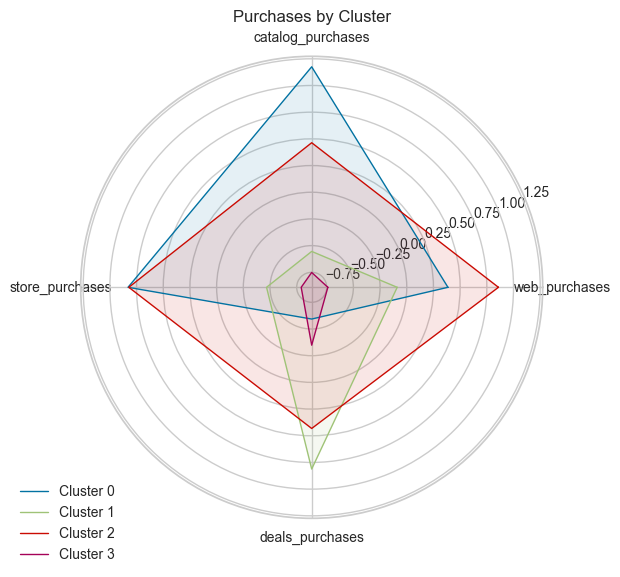

In [22]:
attributes = ['web_purchases', 'catalog_purchases', 'store_purchases', 'deals_purchases']
cluster_means = scaled_df.groupby('Clusters')[attributes].mean().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Purchases by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Cluster 0.** This group has a high income and makes frequent purchases, primarily preferring catalog purchases but also buying from stores and the web.

**Cluster 1.** Although not the highest, this group has a moderate income. They make a decent number of purchases, with a preference for deals and some web purchases.

**Cluster 2.** This group has a high income and makes numerous purchases, showing no strong preference for any particular purchase method. However, store and web purchases are slightly more common.

**Cluster 3.** This group has a low income and makes few purchases, tending to prefer deals due to their limited budget.

#### Cluster Analysis - Products

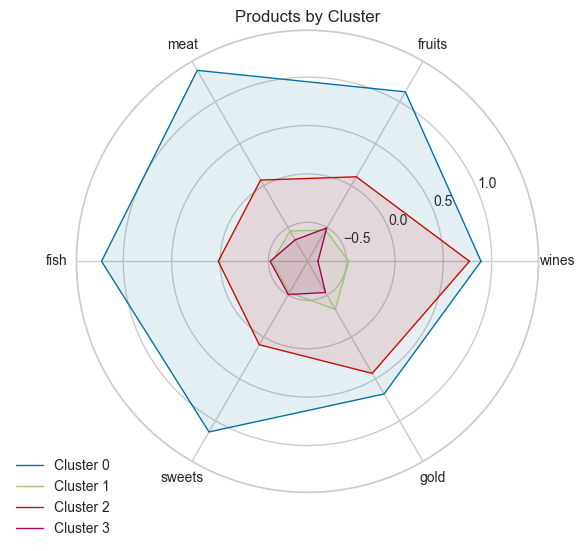

In [23]:
attributes = ['wines', 'fruits', 'meat', 'fish', 'sweets', 'gold']
cluster_means = scaled_df.groupby('Clusters')[attributes].mean().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Products by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Cluster 0.** Due to their high income, this group buys a lot of products, with a slight preference for meats and fish.

**Cluster 1.** With a lower income, this group purchases fewer products but shows a slight preference for gold items.

**Cluster 2.** This group, having a high income, makes a decent number of purchases, favoring wines and gold products.

**Cluster 3.** Limited by their income, this group doesn't buy much, preferring fish, meats, and fruits.

#### Cluster Analysis - Campaings

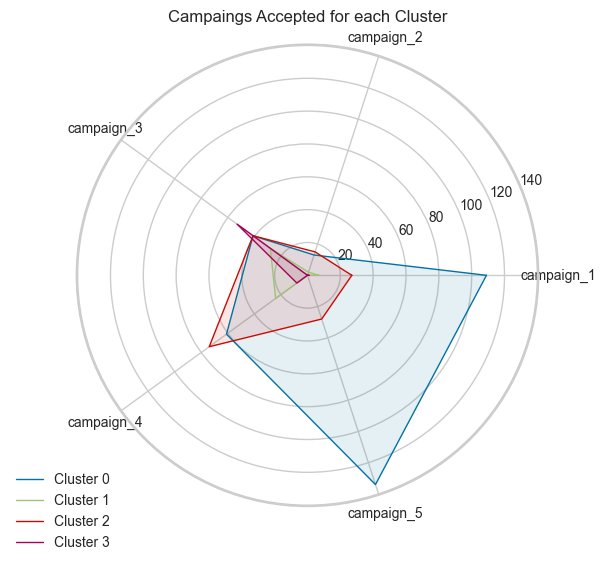

In [24]:
attributes = ['campaign_1', 'campaign_2', 'campaign_3', 'campaign_4', 'campaign_5']
cluster_means = df.groupby('Clusters')[attributes].sum().reset_index()

num_vars = len(attributes)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

plt.title('Campaings Accepted for each Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

**Cluster 0.** This group responded very well to campaigns 1 and 5.

**Cluster 1.** This group didn't respond well to any campaigns, but with improvements, campaigns 3 and 4 might be better received.

**Cluster 2.** They liked campaigns 3 and 4, but with improvements, these campaigns could be even more successful.

**Cluster 3.** With limited income, this group is less interested in products they can't afford. They didn't respond well to the campaigns overall, but campaign 3 showed slight promise.

#### Insights on Cluster Profiles:

##### Cluster 0:

- Features the highest income and spending.
- Typically consists of families with 1 to 2 members, with no children.
- Mostly on graduated education levels.
- Purchases a lot on catalog, store, and a little on web channels.
- Shows significant expenditure on all types of products.
- Predominantly responds to campaign 1 and 5.

##### Cluster 1:

- Characterized by low income and spending.
- Typically consists of families with at least one child.
- Mostly on graduated to postgraduate education levels.
- Purchases primarily through deals and web purchases..
- Purchases fewer products but shows a slight preference for gold items
- Shows a low rate of campaign acceptance, with campaign 3 and 4 being the most accepted.

##### Cluster 2:

- Exhibits high to average income and spending.
- Contains the largest families, with 3 to 4 members.
- Mostly on graduated to postgraduate education levels.
- Includes the oldest demographic.
- Favors purchases from catalogs.
- Makes numerous purchases, showing no strong preference for any particular purchase method. However, store and web purchases are the most common.
- Shows a average acceptance rate for campaigns 3 and 4.

##### Cluster 3:

- Noted for the lowest income and spending.
- Comprises families of 2 or 3 members.
- Includes the youngest demographic.
- Mostly on basic education levels.
- Frequently purchases through deals.
- Shows a high acceptance rate for campaign 3.